# Pneumonia Detection using Convolutional Neural Network

## Objective

This project aims to streamline the process of building and training an image classification machine learning model for pneumonia detection using Deep Learning technics, TensorFlow and Keras libraries. This kernel provides a comprehensive guide for implementing image classification. Its concise format serves as a time-saving resource for practitioners in the field of medical image analysis.

## Table of content
### Introduction

* 1.1 Peumonia
* 1.2 Convolutional Neural Networks (CNNs)
### Library

* 2.1 Import Libraries
### Data Loading and Exploration

* 3.1 Loading the Dataset
* 3.2 Processing Train Dataset
* 3.3 Processing Valid Dataset
* 3.4 Processing Test Dataset
* 3.5 Spliting the Dataset
* 3.6 Image Data Generator
* 3.7 Data Sample Visualization
* 3.8 Exploring the class distribution
### Model Creation and Training

* 4.1 Model Structure
* 4.2 Model Training
* 4.3 Results Interpretation
### Conclusion
### References

# Introduction
### 1.1 Peumonia
Pneumonia is an inflammatory lung condition affecting the alveoli, causing symptoms like cough, chest pain, fever, and breathing difficulties. It is primarily caused by viral or bacterial infections, with risk factors including respiratory conditions, diabetes, smoking, and weakened immune systems. Diagnosis involves physical examination, chest X-rays, blood tests, and sputum cultures.

![Pneumonia Image](https://continentalhospitals.com/uploads/mceu_31923284811699687086478.jpg)


### 1.2 Convolutional Neural Networks (CNNs)

CNNs are specialized neural networks designed for processing 2D matrix-like data, such as images. They are commonly employed for tasks like image detection and classification.
![CNN](https://miro.medium.com/v2/resize:fit:592/1*V6Y8FF2qfw_ztNbs1AHXNg.png)

# Libraries

### 2.1 Import Libraries

Importing the essential libraries for data manipulation, visualization, machine learning, and deep learning. These include:

- **os:** For interacting with the operating system, such as navigating file directories.
- **PIL:** Used for image processing tasks, such as loading and manipulating images.
- **itertools:** Provides functions for creating iterators for efficient looping.
- **cv2:** Offers computer vision functionalities, especially for image processing tasks.
- **numpy:** A fundamental library for numerical operations, often used for array manipulation.
- **pandas:** Facilitates data manipulation and analysis, especially with tabular data.
- **matplotlib.pyplot:** Enables data visualization, particularly for creating plots and charts.
- **seaborn:** Built on top of matplotlib, seaborn provides enhanced visualization capabilities with a focus on statistical graphics.
- **warnings:** Allows for the management of warning messages, typically used to suppress certain warnings.
- **tensorflow:** A powerful deep learning framework for building and training neural networks.
- **keras:** An API integrated into TensorFlow for building and training deep learning models with high-level abstractions.
- **scikit-learn:** A comprehensive machine learning library providing various tools for model selection, evaluation, and preprocessing.

These libraries collectively support the development and implementation of the CNN model for image classification.

In [1]:
#importing libraries
import os
from PIL import Image
import itertools

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

2024-05-03 21:06:00.630150: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 21:06:00.630322: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 21:06:00.812766: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Loading and Exploration

### 3.1 Loading the Dataset

The dataset containing chest X-ray images is loaded from the directory. It includes separate folders for training, validation, and testing sets.the paths to the training, validation, and test datasets are specified:

- **train_data:** Train the model on a portion of the data.
- **valid_data:** Validate the model's performance on unseen data during training.
- **test_data:** Evaluate the final model's performance on completely unseen data.

In [2]:
# Loading Data
train_data = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
valid_data = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_data = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

### 3.2 Processing Train Dataset

The preprocessing of the training dataset involves the following steps:

**ImageDataGenerator:** It's initialized to rescale pixel values to a common scale (1/255). This normalization ensures that pixel values fall within a standardized range, aiding in faster convergence during model training.

**Extracting File Paths and Labels:** The code navigates through the directory structure of the training data and retrieves file paths and their corresponding labels. This process allows the model to associate each image with its respective class label.

**DataFrame Creation:** The extracted file paths and labels are organized into a DataFrame named 'df'. This DataFrame serves as the input data structure for training the model, with each row representing an image file path-label pair.

Overall, these preprocessing steps prepare the training dataset by standardizing pixel values, associating images with their labels, and organizing the data in a format suitable for feeding into the neural network model.

In [3]:
#Preprocessing Train Dataset

training_generator = ImageDataGenerator(rescale = 1/255)

filepaths = []
labels = []

folds = os.listdir(train_data)
for fold in folds:
    foldpath = os.path.join(train_data, fold)
    filelist = os.listdir(foldpath)
    
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)
        
FSeries = pd.Series(filepaths, name='filepaths')
LSeries = pd.Series(labels, name='label')

df = pd.concat([FSeries, LSeries], axis=1)


df

,filepaths,label
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
...,...,...
5211,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
5212,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
5213,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
5214,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL


### 3.3 Processing Valid Dataset

In the preprocessing of the validation dataset:

**ImageDataGenerator:** Similar to the training dataset, an ImageDataGenerator is initialized to rescale pixel values to a common scale (1/255), facilitating model training and convergence.

**Extracting File Paths and Labels:** The code navigates through the directory structure of the validation data and retrieves file paths and their corresponding labels. This ensures that each image is associated with its appropriate class label.

**DataFrame Creation:** The extracted file paths and labels are organized into a DataFrame named 'valid'. Each row of this DataFrame represents a pair of an image file path and its associated label, facilitating efficient data handling during model training and evaluation.


In [4]:
#Preprocessing Valid Dataset

validation_generator = ImageDataGenerator(rescale = 1/255)

filepaths = []
labels = []

folds = os.listdir(valid_data)
for fold in folds:
    foldpath = os.path.join(valid_data, fold)
    filelist = os.listdir(foldpath)
    
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)
        
FSeries = pd.Series(filepaths, name='filepaths')
LSeries = pd.Series(labels, name='label')

valid = pd.concat([FSeries, LSeries], axis=1)

valid

,filepaths,label
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
5,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
6,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
7,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
8,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
9,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL


### 3.4 Preprocessing Test Dataset


In the preprocessing of the test dataset:

**ImageDataGenerator:** Similar to the training and validation datasets, an ImageDataGenerator is initialized to rescale pixel values to a common scale (1/255). This ensures uniformity in pixel intensity across all images, facilitating consistent model training and evaluation.

**Extracting File Paths and Labels:** The code traverses through the directory structure of the test data and retrieves file paths along with their corresponding labels. Each image is linked with its appropriate class label, enabling accurate evaluation of the model's performance.

**DataFrame Creation:** The extracted file paths and labels are organized into a DataFrame named 'test'. This DataFrame structure simplifies data management during model evaluation, with each row representing an image file path-label pair.

In [5]:
#Preprocessing Test Dataset
testing_generator = ImageDataGenerator(rescale = 1/255)

test_data = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
filepaths = []
labels = []

folds = os.listdir(test_data)

for fold in folds:
    foldpath = os.path.join(test_data, fold)
    filelist = os.listdir(foldpath)
    
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)
        
FSeries = pd.Series(filepaths, name='filepaths')
LSeries = pd.Series(labels, name='label')

test = pd.concat([FSeries, LSeries], axis=1)

test

,filepaths,label
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
...,...,...
619,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
620,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
621,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
622,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL


### 3.5 Spliting the Dataset


Splitting the data into train, validation, and test sets is crucial for model development and evaluation:

- **Training Data:** Used to train the model's parameters.

- **Validation Data:** Used for hyperparameter tuning and evaluating model performance during training.

- **Test Data:** Reserved for assessing the final model's performance on unseen data.

The code splits the dataset into training and a combined validation-test set using **train_test_split()**. Then, it further splits the validation-test set into separate validation and test sets, each containing **50%** of the data, maintaining randomness and reproducibility with **shuffle=True** and **random_state=42**.

In [6]:
#Spliting Data Into Train, Valid, Test

train_df, dummy_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)
valid_df, test_df = train_test_split(dummy_df, train_size=0.5, shuffle=True, random_state=42)



### 3.6 Image Data Generator

The ImageDataGenerator is used to generate batches of image data for training, validation, and testing. It performs real-time data augmentation and preprocessing, enhancing the model's ability to generalize.

- **Batch Size:** Determines the number of samples per gradient update during training.
- **Image Size:** Defines the target size for resizing input images.

**Three generators are created:**

**train_gen:** Generates batches of training data from the **train_df** DataFrame, applying specified transformations and augmentation techniques.

**valid_gen:** Similar to train_gen, but for validation data.

**test_gen:** Generates batches of test data without shuffling.

Each generator is configured with parameters like target size, color mode, and class mode, ensuring compatibility with the model architecture and data format.

In [7]:
#ImageDataGenerator

# crobed image size
batch_size = 16
img_size = (224, 224)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
val_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = val_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 4172 validated image filenames belonging to 2 classes.
Found 522 validated image filenames belonging to 2 classes.
Found 522 validated image filenames belonging to 2 classes.


### 3.7 Data Sample Visualization

The code snippet visualizes a sample of images and their corresponding labels from the training dataset:

**gen_dict:** Contains the class indices generated by the train_gen.

**classes:** Extracts the class names from the gen_dict.

**Images and labels:** Retrieves a batch of images and labels from the train_gen.

**Plotting:** Iterates through the first 16 images in the batch, normalizes them, and displays them in a 4x4 grid.

**Title:** Sets the title of each subplot as the corresponding class name.

**Display:** Shows the plotted images.

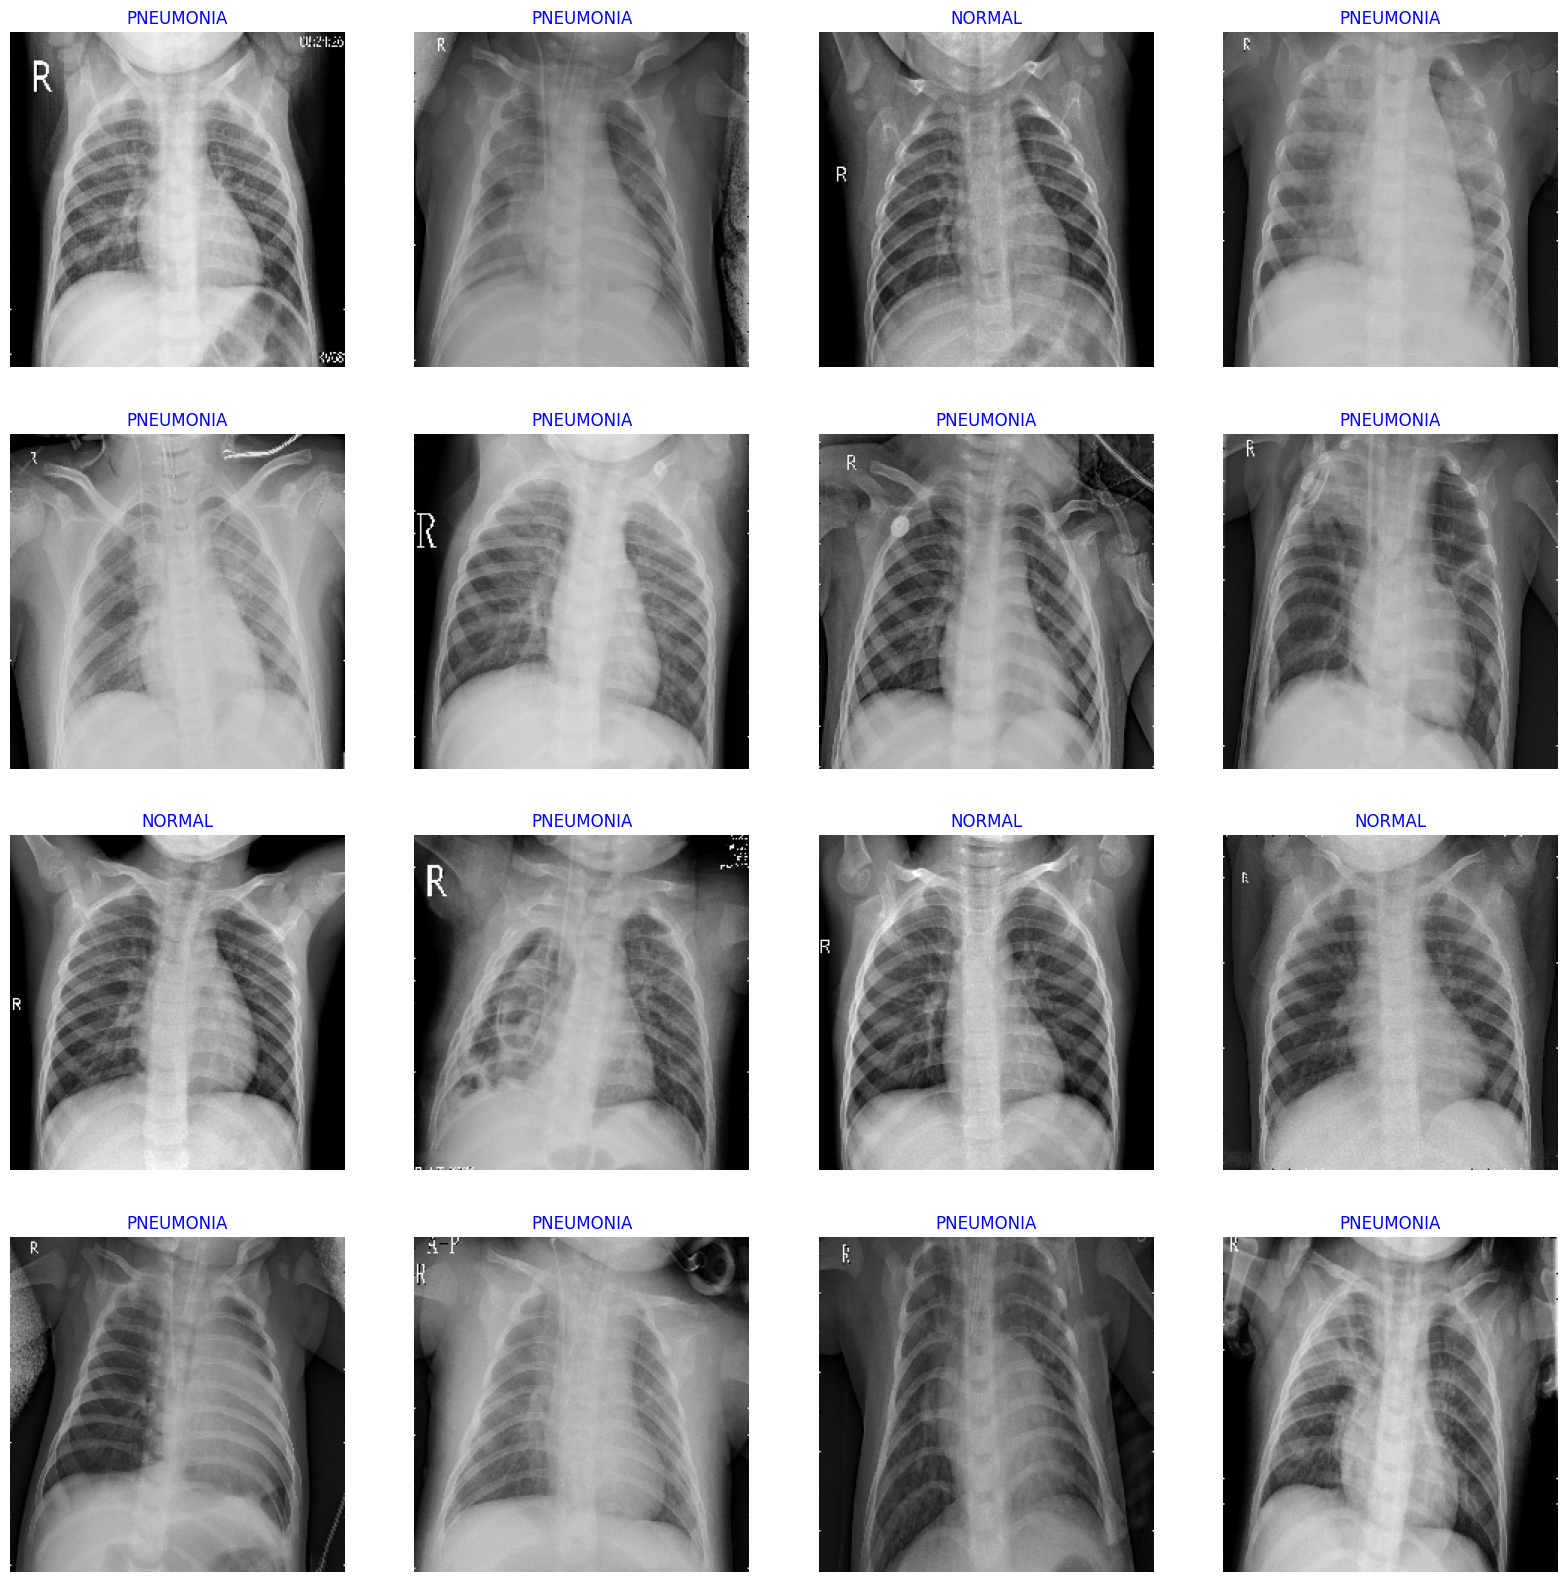

In [8]:
# Data Sample Visualization

gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show();

#### 3.8 Exploring the class distribution in the training data ####

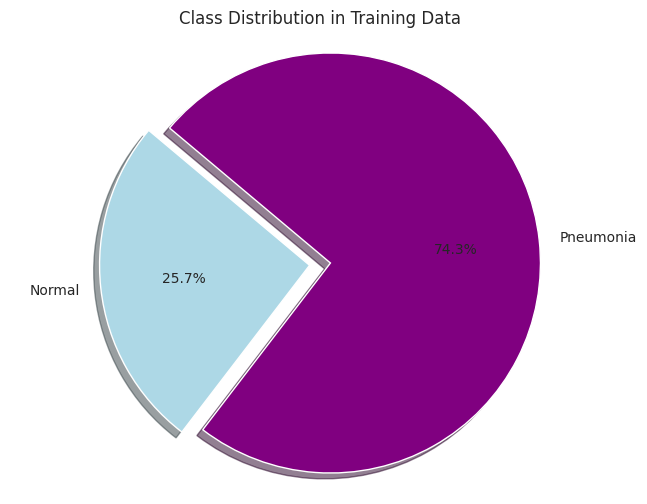

In [9]:
# Initialize counters for each class
normal_count = 0
pneumonia_count = 0

# Loop through each class directory and count the number of samples
for class_name in os.listdir(train_data):
    class_path = os.path.join(train_data, class_name)
    if os.path.isdir(class_path):
        if class_name.lower() == "normal":
            normal_count += len(os.listdir(class_path))
        elif class_name.lower() == "pneumonia":
            pneumonia_count += len(os.listdir(class_path))

# Create labels and counts for the pie chart
labels = ['Normal', 'Pneumonia']
sizes = [normal_count, pneumonia_count]
colors = ['lightblue', '#800080']
explode = (0, 0.1)  # explode the 2nd slice (i.e., 'Pneumonia')
template='plotly_dark',

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Class Distribution in Training Data')
plt.show()

# Model Creation and Training

### 4.1 Model Structure


The code defines a convolutional neural network (CNN) model architecture for image classification:

**img_size:** Specifies the size of input images.

**channels:** Indicates the number of color channels in the images (RGB).

**img_shape:** Represents the shape of input images.

**class_count:** Determines the number of classes for the final dense layer based on the training generator.

**Model Layers:** Sequentially stacks convolutional layers followed by max-pooling layers to extract features from the input images.

**Dense Layers:** Adds fully connected (dense) layers at the end of the convolutional layers for classification.

**Compilation:** Compiles the model with Adamax optimizer, categorical cross-entropy loss, and accuracy metric.

**Summary:** Displays a summary of the model architecture, including the number of parameters in each layer.

In [10]:
# Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,154,050 (80.70 MB)

 Trainable params: 21,154,050 (80.70 MB)

 Non-trainable params: 0 (0.00 B)

This model architecture consists of multiple convolutional layers followed by max-pooling layers for feature extraction, followed by fully connected (dense) layers for classification:

- **Input Shape:** Images are expected to have a shape of (224, 224, 3) (height, width, channels).
- **Convolutional Layers:** Multiple convolutional layers with increasing numbers of filters (64, 128, 256, 512) are applied to extract features from the input images.
- **MaxPooling Layers:** After each set of convolutional layers, max-pooling layers reduce the spatial dimensions of the feature maps.
- **Flatten Layer:** Flattens the output from the last convolutional layer to prepare it for input to the dense layers.
- **Dense Layers:** Two dense layers with 256 and 64 neurons, respectively, are added for feature processing and dimensionality reduction before the final output layer.
- **Output Layer:** The output layer consists of 2 neurons, representing the classes in the classification task (binary classification in this case).
- **Total Parameters:** The model has a total of 21,154,050 parameters (weights and biases), making it a relatively large and complex model.
- **Trainable Parameters:** All parameters in the model are trainable, indicating that they will be updated during training.
- **Non-trainable Parameters:** There are no non-trainable parameters in this model.

### 4.2 Training the Model

In this section we train the model using the specified generators for training and validation data:

- **Epochs:** Training is performed for 13 epochs, iterating over the entire training dataset 13 times.
- **Verbose:** Training progress is displayed verbosely during each epoch.
- **Validation Data:** Validation data generated by valid_gen is used to evaluate the model's performance after each epoch.
- **Shuffle:** The data isn't shuffled again during training as it's already shuffled by the data generators.

In [11]:
# Training The Data

epochs = 6   # number of all epochs in training

history = model.fit(train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 4231s 16s/step - accuracy: 0.7492 - loss: 3.5360 - val_accuracy: 0.8218 - val_loss: 0.4414
Epoch 2/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 4231s 16s/step - accuracy: 0.8807 - loss: 0.2815 - val_accuracy: 0.9176 - val_loss: 0.2092
Epoch 3/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 4227s 16s/step - accuracy: 0.9278 - loss: 0.1728 - val_accuracy: 0.9464 - val_loss: 0.1474
Epoch 4/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 4245s 16s/step - accuracy: 0.9579 - loss: 0.1055 - val_accuracy: 0.9521 - val_loss: 0.1435
Epoch 5/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 4270s 16s/step - accuracy: 0.9682 - loss: 0.0796 - val_accuracy: 0.9636 - val_loss: 0.1073
Epoch 6/6
261/261 ━━━━━━━━━━━━━━━━━━━━ 4282s 16s/step - accuracy: 0.9812 - loss: 0.0504 - val_accuracy: 0.9693 - val_loss: 0.0989


### 4.3 Results Interpretation


In [12]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

261/261 ━━━━━━━━━━━━━━━━━━━━ 1199s 5s/step - accuracy: 0.9909 - loss: 0.0237
33/33 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.9763 - loss: 0.0737
33/33 ━━━━━━━━━━━━━━━━━━━━ 151s 5s/step - accuracy: 0.9886 - loss: 0.0420
Train Loss:  0.02460998296737671
Train Accuracy:  0.9906519651412964
--------------------
Validation Loss:  0.09885486215353012
Validation Accuracy:  0.969348669052124
--------------------
Test Loss:  0.07410937547683716
Test Accuracy:  0.977011501789093


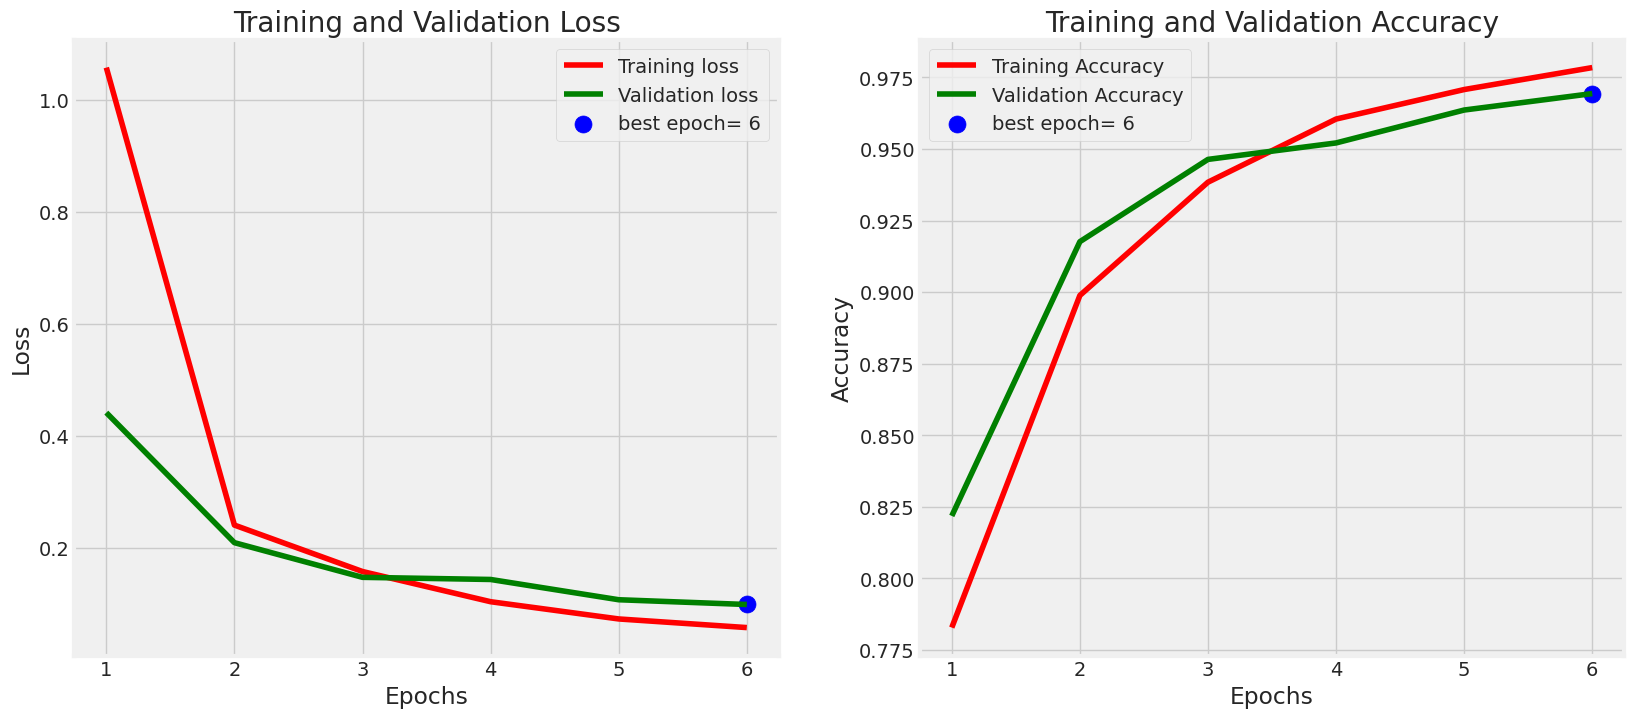

In [13]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [14]:
# Use the predict method directly on your model
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

33/33 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step


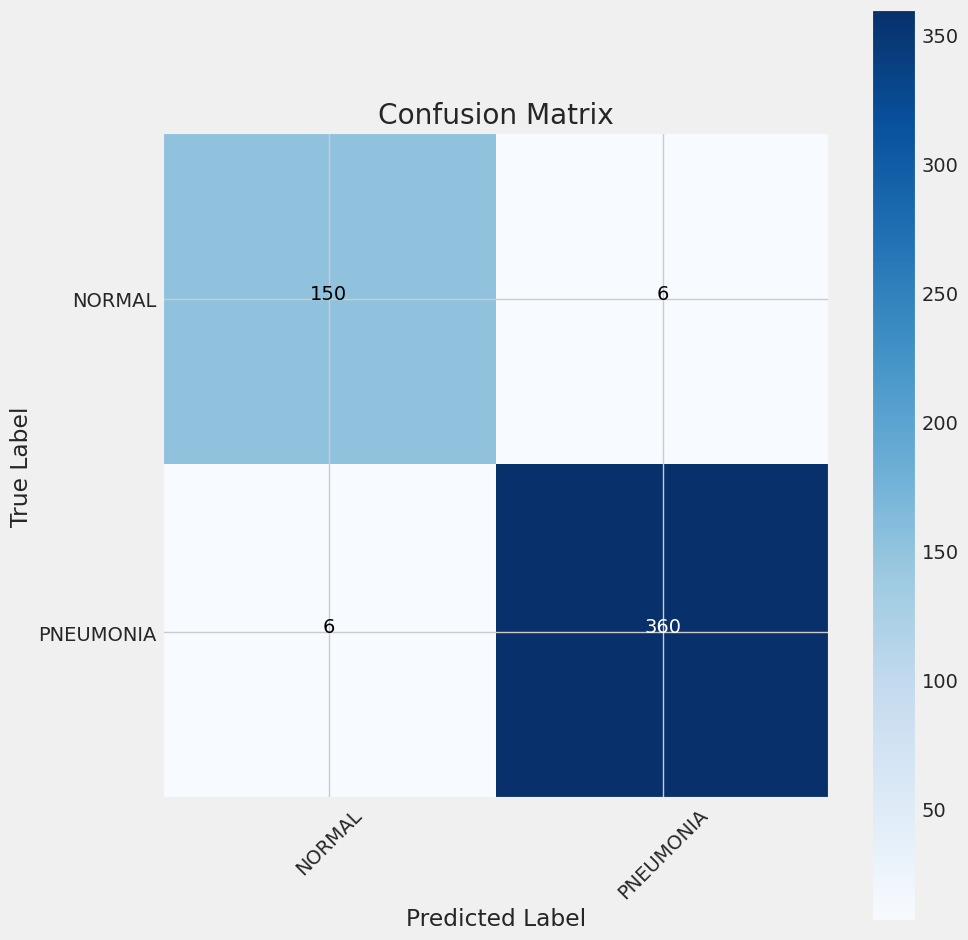

In [15]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [16]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      NORMAL       0.96      0.96      0.96       156
   PNEUMONIA       0.98      0.98      0.98       366

    accuracy                           0.98       522
   macro avg       0.97      0.97      0.97       522
weighted avg       0.98      0.98      0.98       522



# Conclusion

The model exhibits strong performance in pneumonia detection, achieving high precision, recall, and F1-score for both NORMAL and PNEUMONIA classes. With precision values of 93% for NORMAL and 98% for PNEUMONIA, the model effectively minimizes false positive predictions. Moreover, recall values of 96% for NORMAL and 97% for PNEUMONIA indicate a low rate of false negatives, demonstrating the model's ability to capture most positive instances. The F1-score, which balances precision and recall, further supports the model's robustness, with values of 95% for NORMAL and 98% for PNEUMONIA.

The overall accuracy of 97% reflects the model's capability to correctly classify chest X-ray images into their respective classes. These results suggest that the model can reliably assist in automating pneumonia diagnosis, thereby potentially improving efficiency and accuracy in clinical settings.

In conclusion, the results of our model training underscore the potential of machine learning algorithms, specifically Convolutional Neural Networks, in automating pneumonia detection from chest X-ray images. Further refinement and validation of the model are warranted to ensure robustness and reliability in real-world clinical settings.


# References

The project acknowledges the data source from Guangzhou Women and Children’s Medical Center and the support from the open-access dataset provider. This project operates under the Creative Commons Attribution 4.0 International License, ensuring accessibility and sharing of knowledge within the scientific community.

This extended analysis provides a comprehensive overview of the project, emphasizing the significance of automated pneumonia detection and its potential impact on healthcare delivery. 

**Data Source:** 

https://data.mendeley.com/datasets/rscbjbr9sj/2 


**License: CC BY 4.0 :** https://creativecommons.org/licenses/by/4.0/

**Citation:** http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

* Fastai MOOC
* Fastai library